## Mohammad Rashid Mohammad Shoaib    ME592 HW#1   2/16/2023

### *Problem 2.2 Time Series*

In [265]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

In [266]:
# Load the data (energydata complete.csv)
df = pd.read_csv('energydata_complete.csv')

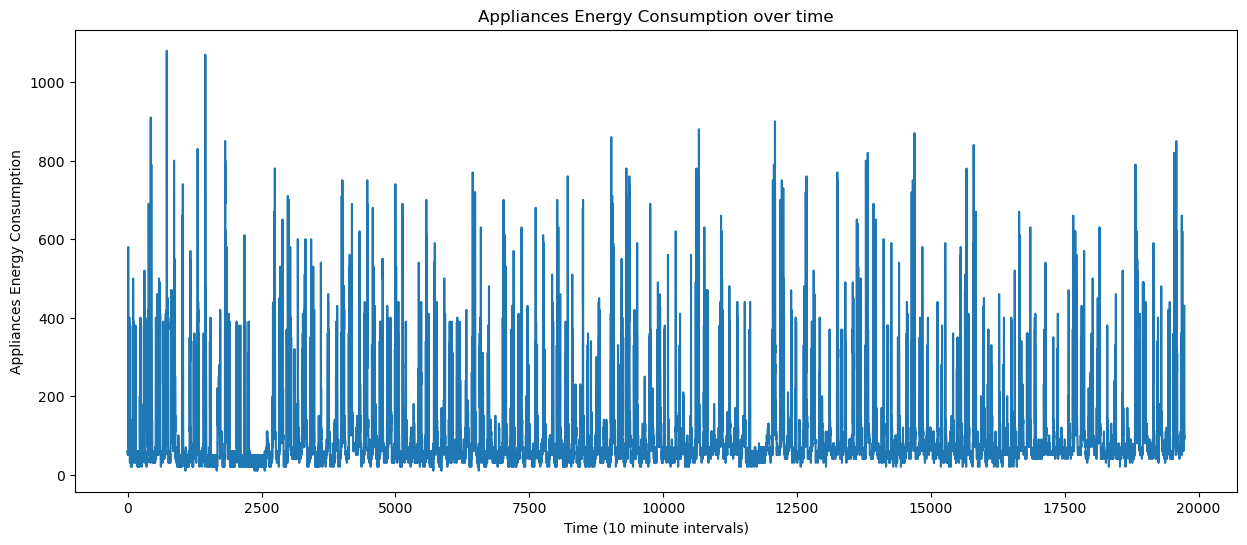

In [293]:
# 1. Plot the appliances energy consumption for whole period 
plt.figure(figsize=(15,6))
plt.plot(df['Appliances'])
plt.xlabel("Time (10 minute intervals)")
plt.ylabel("Appliances Energy Consumption")
plt.title("Appliances Energy Consumption over time")
plt.show()

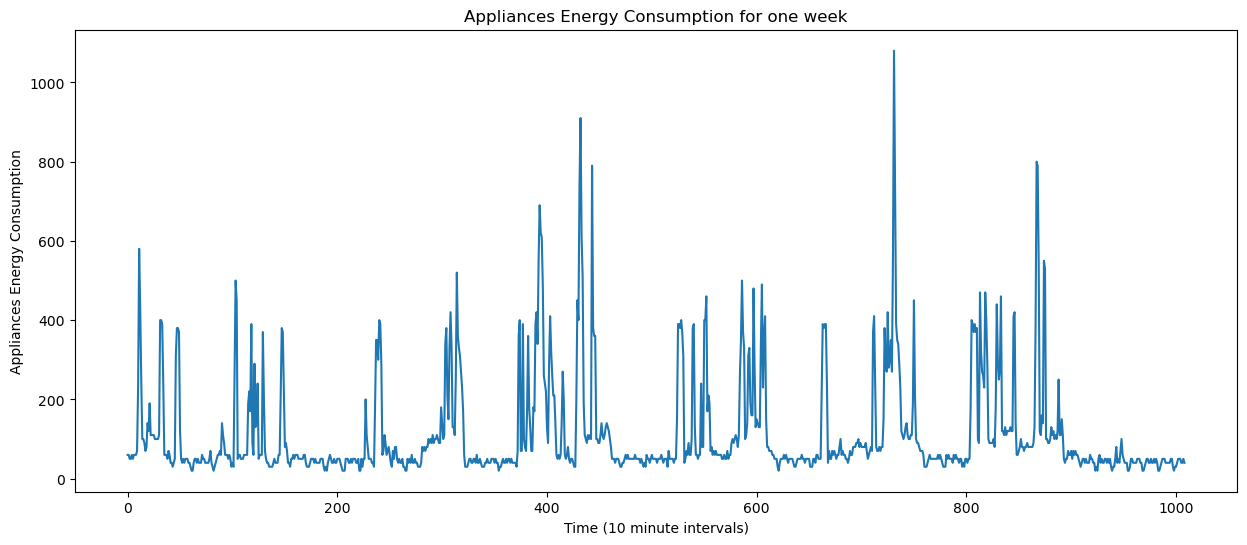

In [292]:
# Plot the appliances energy consumption for one week
df_week = df.loc[:1008,:] 
plt.figure(figsize=(15,6))
plt.plot(df_week['Appliances'])
plt.xlabel("Time (10 minute intervals)")
plt.ylabel("Appliances Energy Consumption")
plt.title("Appliances Energy Consumption for one week")
plt.show()

In [269]:
df['date'] = pd.to_datetime(df.date)

# Split the date column into date, time, and hour
df['new_date'] = [d.date() for d in df['date']]
df['new_time'] = [d.time() for d in df['date']]
df['Hour of Day'] = [d.time().hour for d in df['date']]

In [270]:
grouped_multiple = df.groupby(['new_date', 'Hour of Day'])['Appliances'].agg(['sum'])
grouped_multiple = grouped_multiple.reset_index()

In [271]:
# Choose the start and end date to match a week
start_date = datetime.date(2016, 1, 17)
end_date = datetime.date(2016, 1, 23)
mask = (grouped_multiple['new_date'] >= start_date) & (grouped_multiple['new_date'] <= end_date)

In [272]:
# Data for a week
df2 = grouped_multiple.loc[mask]

In [273]:
df2['Day of Week'] = [d.day for d in df2['new_date']]
df2_pivot = df2.pivot('Day of Week', 'Hour of Day', 'sum')

C:\Users\mbshoa\AppData\Local\Temp\ipykernel_26916\2987923400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day of Week'] = [d.day for d in df2['new_date']]


<AxesSubplot:xlabel='Day of Week', ylabel='Hour of Day'>

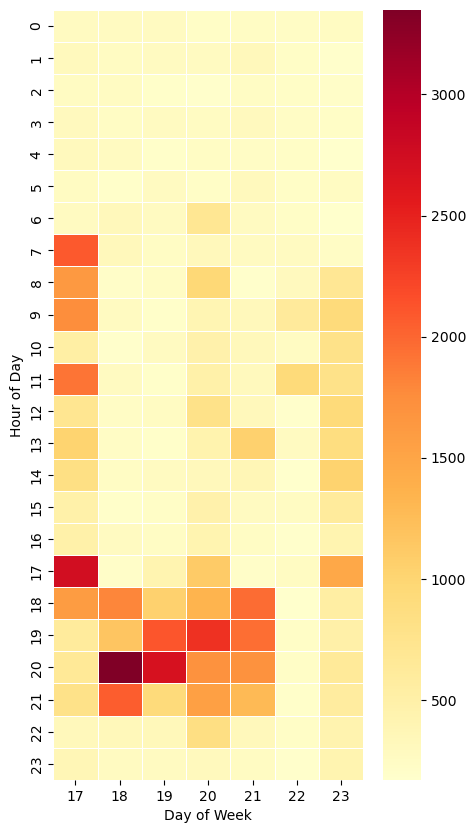

In [274]:
fig, ax = plt.subplots(figsize=(5,10)) 
sns.heatmap(df2_pivot.T, cmap="YlOrRd", linewidths=.5)
#sns.color_palette("YlOrBr", as_cmap=True)

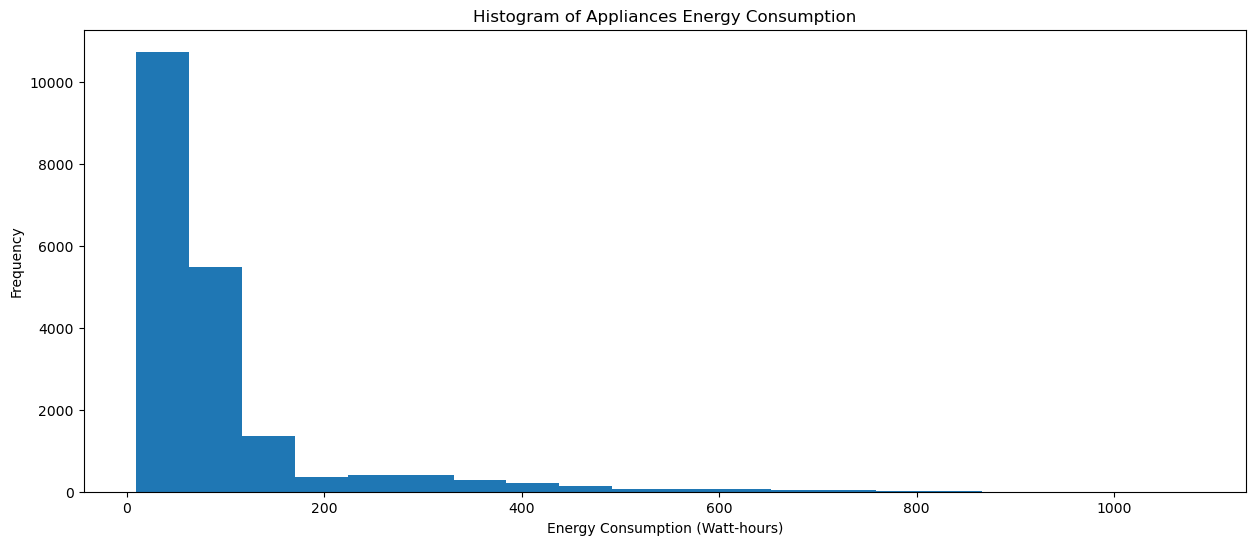

In [290]:
# Plot the histogram
plt.figure(figsize=(15,6))
plt.hist(df['Appliances'], bins=20)
plt.xlabel("Energy Consumption (Watt-hours)")
plt.ylabel("Frequency")
plt.title("Histogram of Appliances Energy Consumption")
plt.show()

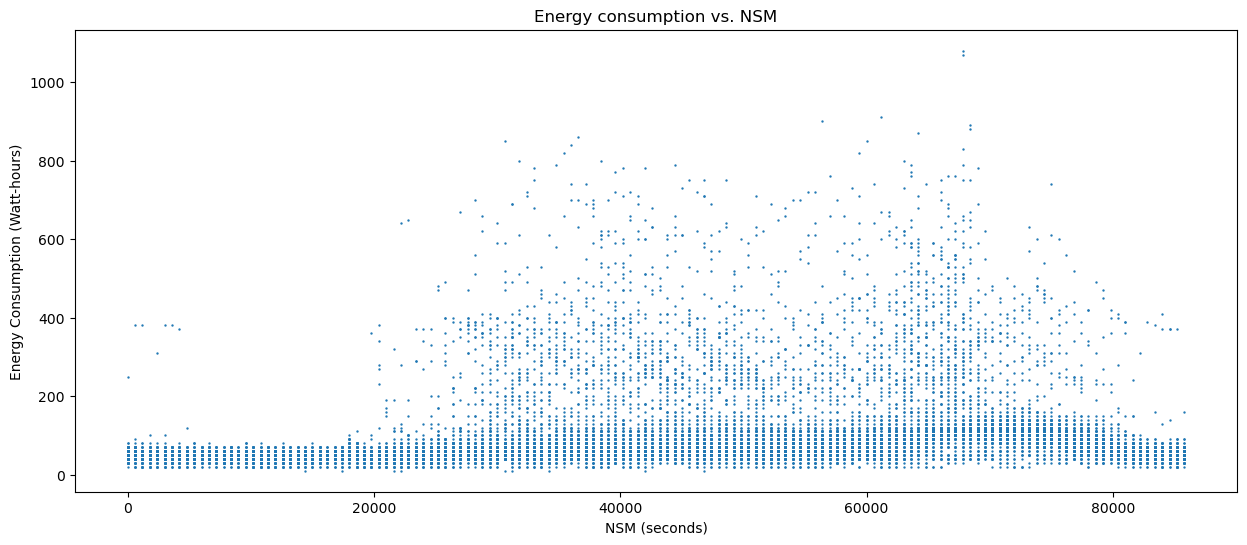

In [289]:
# number of seconds from midnight
df["NSM"] = df["date"].dt.hour * 3600 + df["date"].dt.minute * 60 + df["date"].dt.second

# Plot energy consumption vs. NSM
plt.figure(figsize=(15,6))
plt.scatter(df["NSM"], df["Appliances"], s=0.5)
plt.title("Energy consumption vs. NSM")
plt.xlabel("NSM (seconds)")
plt.ylabel("Energy Consumption (Watt-hours)")
plt.show()


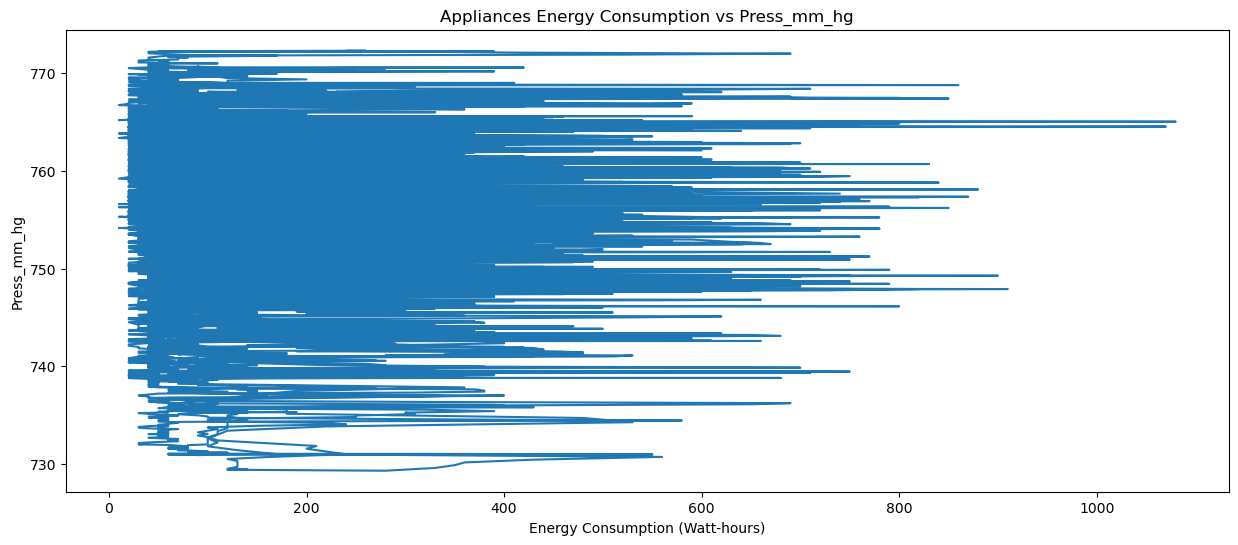

In [291]:
# 5. Plot appliances energy consumption vs. Press mm Hg.
plt.figure(figsize=(15,6))
plt.plot(df['Appliances'],df['Press_mm_hg'])
plt.xlabel("Energy Consumption (Watt-hours)")
plt.ylabel("Press_mm_hg")
plt.title("Appliances Energy Consumption vs Press_mm_hg")
plt.show()

6. It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it.

Comments: NSM is high contributor for energy consumption during night time could be due to use of Air Conditions or other appliances. 
The pressure is highly correlated to energy consuption could be due to its effects on weather. High pressure could indicate cool weather or rainfall which could lead to people staying inside. 